<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Владислав! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Описание проэкта

Компания <<Мегалайн>> имеет две группы пользователей. Группа каторая пользуется новыми тарифами 'Ultra' и 'Smart', также группа которая пользуется архивными тарифами. Компания хочет предложить последней группе новые тарифы, и они хотят чтобы предложенный тариф подходил пользователем. Мы построим модель которая анализирует повадки или нужды пользователя и предлагает подходящий тариф. Сделаем это с помощью данных от пользователей новых тарифов.

# План

1. Изучение данных
2. Деление данных на обучающие, валидационные и тестовые выборки
3. Тестирование разных моделей, и гиперпараметров. Короткий вывод после каждого исследования
4. Проверить качество модели на тестовой выборке
5. Проверка на вменяемость

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

    
Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. План это хорошо, но где описание проекта?





</div>

<div style="background:magenta; padding:1rem;">
    Спасибо, исправленно выше!
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍
</div>

# Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import time

import os


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости.

</div>




In [2]:
local_path_df_user_behavior = './datasets/users_behavior.csv'
# web_path_df_user_behavior = '/datasets/user_behavior.csv'
# КОД РЕВЬЮЕРА
web_path_df_user_behavior = '/datasets/users_behavior.csv'

In [3]:
if os.path.exists(local_path_df_user_behavior):
  df = pd.read_csv(local_path_df_user_behavior)
elif os.path.exists(web_path_df_user_behavior):
  df = pd.read_csv(web_path_df_user_behavior)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 
    
Мне пришлось подправить твой код чтобы запустилось. Для некоторых особо строгих ревьюеров это основание завернуть работу без проверки, так что будь внимательней в следующий раз )
    
Совет - используй конструкцию try except:    
  
    try:
        df = pd.read_csv()
    except:
        df = pd.read_csv()
</div>

<div style="background:magenta; padding:1rem;">
    Спасибо, предидущие ревьюеры мне рекомендовали "os.path" метод. Не уверен в чем была ошибка. Предпологаю, что в принципе "try/excpet" метод надежнее!
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:
    
    
Ты букву потерял в названии имени файла. Можно и if/else применять с os.path.exists, разница не принципиальна

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


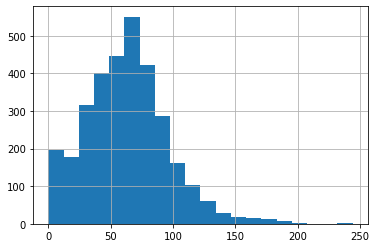

In [6]:
df['calls'].hist(bins=20)
plt.show()

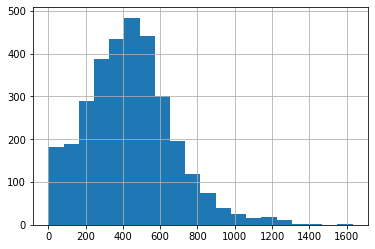

In [7]:
df['minutes'].hist(bins=20)
plt.show()

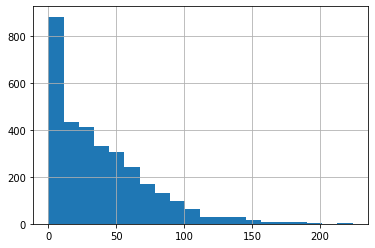

In [8]:
df['messages'].hist(bins=20)
plt.show()

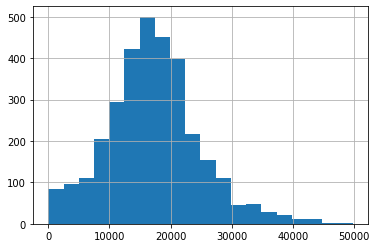

In [9]:
df['mb_used'].hist(bins=20)
plt.show()

В описании проэкта написанно, что не надо очищать данные, в графиках сверху видно что есть данные каторые сильно повлияют на 'std' но ме будем верить данным

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 



<div class="alert alert-warning">



Совет: 

Стоило еще проверить датасет на сбалансированность таргетов, это бы дало информацию для train_test_split и помогло решить бонусное задание сразу. 




</div>


<div style="background:magenta; padding:1rem;">
    Сбалансированность таргетов, это соотношение информации планов "Ultra" и "Smart"? Чем ближе к 50/50 тем лучше?
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Для некоторых моделей несбалансированность проблема - качество падает. На следующем проекте как раз этим озаботитесь )
</div>

In [10]:
print("Ratio of ultra plans to smart: {:.3f}".format(df['is_ultra'].sum()/df['is_ultra'].size))

Ratio of ultra plans to smart: 0.306


<div style="background:magenta; padding:1rem;">
    Сбалансированность таргетов могла бы быть получше 🤷‍♂️
</div>

# Деление данных на обучающие, валидационные и тестовые выборки

In [11]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_test, target_train, target_test  = train_test_split(
  features, target, test_size=0.2, random_state=12345)

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(
  features_train, target_train, test_size=0.25, random_state=12345)

In [13]:
# проверка на пересечение

# display(set(features_train.index) & set(features_test.index), set(features_test.index) & set(features_valid.index))
# display(features_train.shape, features_test.shape, features_valid.shape)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


- Обрати внимание на 2 сплит, там ошибка, приведшая к тому что одни и те же данные в разных датасетах, и не все данные попали в созданные датасеты.    
    
- Общепринято разбиение на test и validation так чтобы разница между ними была не больше чем в два раза (и не меньше чем по 10% от общего датасета)  

    
    
<div class="alert alert-warning">



Совет: 


- Если посмотреть на соотношение меток 1 и 0 в таргете, мы увидим дисбаланс, это важно учитывать. Поэтому, на будущее обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах. 


- После разбиения лучше перестраховаться и использовать .shape, для контроля за корректностью разбиения (это позволило бы избежать ошибки)

<div>

<div style="background:magenta; padding:1rem;">
    Да была ошибка. По плану было разделить (train 80/20 test) потом (train 60/20 valid). Вместо features_train я выбрал features_test.
</div>
<div style="background:magenta; padding:1rem;">
    Надо было проверить shape 😅
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Теперь ок. 
    
Я код свой оставил, забыл убрать ))
</div>

# Тестирование разных моделей, и гиперпараметров. Короткий вывод после каждого исследования

### DecisionTreeClassifier

DecisionTreeClassifier depth:  1  precision: 0.73872  time: 0.00482
DecisionTreeClassifier depth:  2  precision: 0.75739  time: 0.00417
DecisionTreeClassifier depth:  3  precision: 0.76516  time: 0.00448
DecisionTreeClassifier depth:  4  precision: 0.76361  time: 0.00509
DecisionTreeClassifier depth:  5  precision: 0.75894  time: 0.00566
DecisionTreeClassifier depth:  6  precision: 0.75739  time: 0.00587
DecisionTreeClassifier depth:  7  precision: 0.77449  time: 0.00647
DecisionTreeClassifier depth:  8  precision: 0.76672  time: 0.00691
DecisionTreeClassifier depth:  9  precision: 0.76205  time: 0.00708
DecisionTreeClassifier depth: 10  precision: 0.77138  time: 0.00780
DecisionTreeClassifier depth: 11  precision: 0.75894  time: 0.01566
DecisionTreeClassifier depth: 12  precision: 0.75583  time: 0.00847
DecisionTreeClassifier depth: 13  precision: 0.74961  time: 0.00896
DecisionTreeClassifier depth: 14  precision: 0.75739  time: 0.00907
DecisionTreeClassifier depth: 15  precision: 0.7

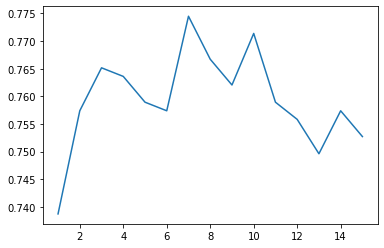

In [14]:
# лучшая модел после тестов
model_DecisionTreeClassifier = None
precision_DecisionTreeClassifier = 0
tree_depths = range(1, 16)
model_precisions = []
for tree_depth in tree_depths:
    start = time.time()
    model = DecisionTreeClassifier(random_state=12345, max_depth=tree_depth)
    model.fit(features_train, target_train)
    result = model.predict(features_valid)
    precision = accuracy_score(target_valid, result)
    model_precisions.append(precision)
    end = time.time()
    if precision > precision_DecisionTreeClassifier:
        precision_DecisionTreeClassifier = precision
        model_DecisionTreeClassifier = model
    print("DecisionTreeClassifier depth:{:3d}  precision: {:.5f}  time: {:.5f}".format(tree_depth, precision, (end-start)))
    
plt.plot(tree_depths, model_precisions)
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями:    

 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле



<div class="alert alert-warning">


Совет как сделать проект лучше: 

- Посмотреть как при изменении гиперпараметров меняется точность на train и validation,  для этого лучше использовать график (по oX значения гиперпараметра, по oY метрику). Такой способ используют чтобы лучше отследить переобучение


</div>

- Best precision = 0.77449
- Time = 0.00613
- DecisionTreeClassifier depth = 7

### RandomForestClassifier

RandomForestClassifier trees: 50 depth: 10 precision: 0.79782  time: 0.14933


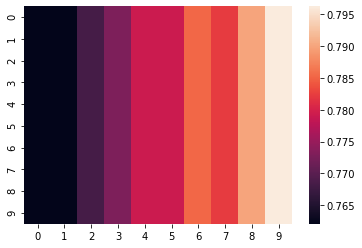

In [15]:
# first hyperparameter
tree_counts = range(10, 101, 10)
# second hyperparameter will be the same as previous in range (1, 11) so we can cover the peak of previous test
max_depths = range(1, 11)
# best resulsts will be saved
model_RandomForestClassifier = None
precision_RandomForestClassifier = 0
tree_count_RandomForestClassifier = 0
depth_RandomForestClassifier = 0
time_RandomForestClassifier = 0
# the way to see the resulst in 3d space is to build a heatmap
precisions = [[0] * len(max_depths)] * len(tree_counts)

for tree_count in tree_counts:
    for depth in max_depths:
        start = time.time()
        model = RandomForestClassifier(random_state=12345, n_estimators=tree_count, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.predict(features_valid)
        precision = accuracy_score(target_valid, result)
        end = time.time()
        
        # populating the heatmap
        precisions[tree_count//10-1][depth-1] = precision
        
        if (precision > precision_RandomForestClassifier):
            model_RandomForestClassifier = model
            precision_RandomForestClassifier = precision
            tree_count_RandomForestClassifier = tree_count
            depth_RandomForestClassifier = depth
            time_RandomForestClassifier = (end - start)

sns.heatmap(precisions)

print("RandomForestClassifier trees:{:3d} depth:{:3d} precision: {:.5f}  time: {:.5f}"
      .format(tree_count_RandomForestClassifier, depth_RandomForestClassifier, precision_RandomForestClassifier, time_RandomForestClassifier))


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно.

<div class="alert alert-warning">

Совет (опять же это не обязательно, но рекомендации оставляю):



- Можно было сделать похитрее - добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
    
    
- А еще можно вместо цикла использовать sklearn-ий встроенный функционал GridSearch. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_.  Если хочешь можешь сразу попробовать.



</div>



<div style="background:magenta; padding:1rem;">
    Наверняка полезный пример, но тогда будет трудно еще посчитать время
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

Намудрил с графиком и precisions[tree_count//10-1][depth-1]   не сработал. Проще было записать в список, а затем разбить на матрицу нужного размера

    
Чтобы замерить время используй %%time. Ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить.    
</div>

### LogisticRegression

In [23]:
start = time.time()
model_LogisticRegression = LogisticRegression(random_state=12345)
model_LogisticRegression.fit(features_train, target_train)
result = model_LogisticRegression.predict(features_valid)
precision = accuracy_score(target_valid, result)
end = time.time()
print("LogisticRegression precision: {:.5f}  time: {:.5f}".format(precision, (end-start))) 

LogisticRegression precision: 0.72628  time: 0.03570



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

У логистической регрессии тоже есть свои гиперпараметры, самый известный C - параметр регуляризации. Можно поиграться с: 

solvers = ['newton-cg', 'lbfgs', 'saga']
penalty = ['l1', 'l2']    



Но это не приведет к улучшению, так что даже не пробуй  )) Логистическая регрессия все равно окажется худшей. Есть версии почему? 
</div>


<div style="background:magenta; padding:1rem;">
    Ну вот, после исправления ошибок, логистическая регрессия не такая плохая 
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка:

Обучаешь model_LogisticRegression,   а предсказываешь  model. Так что логистическая регрессия все также плоха.
    
</div>


<div style="background:magenta; padding:1rem;">
    Мне кажется что лес будет лучше тольто потомы что там много 'estimators' и средний результат более акуратный
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Ошибка:

    
Все та же ошибка. Вот твой код
    
    start = time.time()
    model_LogisticRegression = LogisticRegression(random_state=12345)
    model_LogisticRegression.fit(features_train, target_train)
    result = model.predict(features_valid)
    precision = accuracy_score(target_valid, result)
    end = time.time()
    print("LogisticRegression precision: {:.5f}  time: {:.5f}".format(precision, (end-start)))     

    
Как называется твоя обученная модель?! model_LogisticRegression, а какой моделью ты делаешь прогноз? model. А что зэто за модель?  RandomForestClassifier(max_depth=10, random_state=12345)   
    
    
Внизу я написал верный код по которому мы видим что   LogisticRegression дает точность   0,72628. Это худший результат из трех
</div>

In [17]:
# код ревьюера
start = time.time()
model_LogisticRegression = LogisticRegression(random_state=12345)
model_LogisticRegression.fit(features_train, target_train)
result = model_LogisticRegression.predict(features_valid)
precision = accuracy_score(target_valid, result)
end = time.time()
print("LogisticRegression precision: {:.5f}  time: {:.5f}".format(precision, (end-start))) 

LogisticRegression precision: 0.72628  time: 0.04168


### Описание

'RandomForestClassifier' оказался самым точным, но не сильно точнее логической регрессии

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

На самом деле DT вообще не используют, это слабая модель, а RF одна из лучших в классическом ML. Почему у тебя так получилось?! Ты просто не "дожал" RF, можно было подольше поучиться, использовать перебор по большему числу гиперпараметров.  

</div>

<div style="background:magenta; padding:1rem;">
    Честно говоря ожидал лучшего результата от RF, можен надо было проверять все гиперпараметры 😖
</div>

# Проверить качество модели на тестовой выборке

также по скольку 'DecisionTreeClassifier' был быстрее и одинаково точен ме будем использовать его

In [18]:
test_result = model_RandomForestClassifier.predict(features_test)
test_precision = accuracy_score(target_test, test_result)
print("The accuracy of the test is {:.3f}".format(test_precision))

The accuracy of the test is 0.799


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, логика моделиирования не нарушена, тут тестируем только лучшую модель отобранную на валидации. Но после внемения изменений результат может измениться.




<div class="alert alert-warning">

Вопросики и совет:




- Как улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.
    
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 




- В качестве бонуса можешь вывести еще несколько метрик своей модели - precision, recall, F1 и confussion matrix) Все есть в sklearn)




</div>

# Проверка на вменяемость

In [19]:
test_target_ratio = target_test.sum() / target_test.size
test_target_ratio

0.3048211508553655

мы видем что наша модель была более точна чем модель с нулевым 'random_state'

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

'random_state' - это чтобы побороть рандом при моделировании, разбиении (ведь при каждому запуске кода у нас тот же train_test_split может разбивать данные по разному, поэтому и приравниваем random_state к конретному числу, чтобы каждый раз получить один и тот же результат)

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Бонусное на то и бонусное, но можешь попробовать его решить с моей подсказкой.    

В чем смысл проверки модели на адекватность? Вот смотри - обучили мы какую то модель, которая на test показывает 90% accuraсy. Шикарная модель скажем мы. А если в датасете у нас в метках таргета единичек 99,9% (допустим тренируем на данных где 1 это "кирпич упал на голову человеку когда он вышел из дома"), а нулей 0,1% ("не упал")?! Все также утверждаем что наша модель шикарная?!


При проверке на адекватность модели, рекомендую ознакомиться с Dummy Models, это удобная обертка для константных моделей

</div>

<div style="background:magenta; padding:1rem;">
    Понятно, мне кажется иммено это я и проверил 😎
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка:

Все что я вижу так это ты взял RandomForestClassifier обучил ее и сделал прогноз. Что такое "random_state" я писал, это не имеет отношение к случайному предсказанию.  
    
Подсказываю - что насчет дисбаланса в таргете? У нас нулей в таргете сколько процентов? Если мы будем постоянно предсказывать ноль то какая будет acuuracy такого наивного прогноза?
</div>

<div style="background:magenta; padding:1rem;">
    По моему я проверил процент таргетов еще в анализе данных, 
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Совет: 

Теперь понял. Владислав формулируй свои мысли точней 
    
    "мы видем что наша модель была более точна чем модель с нулевым 'random_state'" -------->
    
    "мы видим что наша модель была более точна чем модель постоянно предсказывающая самый частый класс"

</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Спасибо тебе Владислав за проделанную работу, к сожалению, сейчас я не могу принять твой проект, поэтому мы с тобой еще пообщаемся )

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 

- обрати внимание на проверку сбалансированности в таргете
- добавить график метрики    
- посоветовал начинать присматриваться к GreedSearch
- как можно улучшить результаты 

Замечания на будущее:
    
- Комментарии к коду отсутствуют - коллеги могут не понять хода твоих мыслей. 
- Было бы замечательно, в конце немножко о данных, работе с ними, моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
Обязательное к исправлению:

- обрати внимание на 2 сплит, он привел сразу к нескольким ошибкам (пересечение данных, потеря данных, отход от пропорции 3:1:1)    

- к моменту проверки качества прогноза на тесте, приходим с уже одной выбранной моделью с лучшими гиперпараметрами выбранными на валидации

- стоит переделать бонусное задание с учётом моего комментария

 
 

Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


</div>




</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Со сплитами разобрались, это плюс. Но по прежнему есть красное. Во первых изза невнимательности - обучаешь одну модель, прогноз делаешь по другой. Heatmap не корректно построен (но это был совет, поэтом у не обязательно доводить до ума, хотя желательно). Бонусное ты правильно так и не решил, что такое random_state я писал уже (опять же по желанию, в принципе решения я написал, нужно только оформить его правильно).
</div>

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>


Владислав, осталось одно красное, касается описки в имени модели. Испркавляй и пора уже принимать проект )
</div>

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Владислав, ты исправил красное, отреагировал на многие желтые (что было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и ты узнал что то новое, а проект стал лучше, и метрика улучшилась. 
    
Отличная работа. Желаю успехов в дальнейшей учебе! И будь внимательней, ведь твою работу мог принять уже давно, если бы не описки.
    
</div>

